# CNN - redes neuronales convolucionales

Vamos a implementar diferentes modelos de redes convolucionales y realizar el ejercicio de probar su funcionamiento con la base de datos MNIST

### Caso 1:

Ejemplo de una red neuronal convolucional (CNN) de tres capas que utiliza TensorFlow para clasificar imágenes. Este ejemplo supone una arquitectura simple con dos capas convolucionales seguidas de agrupación máxima y una capa completamente conectada para la clasificación.


```python
import tensorflow as tf
from tensorflow.keras import layers, models

# Define el modelo CNN
model = models.Sequential()

# Primera capa convolucional
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Segunda capa convolucional
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten Layer : permite concatenar las caracteristicas en un vector unidimensional (aplanar)
#sirve para preparar los datos de entrada a una red completamente conectada (FC - fully connected)
model.add(layers.Flatten())

# Fully Connected Layer
model.add(layers.Dense(64, activation='relu'))

# Capa de salida
model.add(layers.Dense(10, activation='softmax'))  # En este caso se tienen 10 clases

# Compile el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# mostar el resumen
model.summary()
```

**Explicación:**

1. **Capas convolucionales**: las dos primeras capas son capas convolucionales. Están diseñados para aprender características a partir de los datos de entrada. Las capas `Conv2D` aplican un conjunto de filtros a la entrada y cada filtro aprende una característica diferente.

2. **Capas pooling o agrupacion MaxPooling**: después de cada capa convolucional, hay una capa de agrupación  (`MaxPooling2D`). Esta capa reduce las dimensiones espaciales (ancho y alto) de los datos, lo que ayuda a reducir el cálculo y evita el sobreajuste.

3. **Flatten Layer**: esta capa se utiliza para convertir los datos multidimensionales en una matriz unidimensional. Esto es necesario antes de pasar los datos a capas completamente conectadas.

4. **Capas completamente conectadas - Fully connected**: los datos aplanados pasan a través de una o más capas completamente conectadas, que realizan la tarea de clasificación.

5. **Capa de salida**: la capa final utiliza la función de activación softmax para generar probabilidades para cada clase.

6. **Compilación**: el modelo se compila con un optimizador, una función de pérdida y la métrica deseada para su evaluación.

7. **Resumen del modelo**: Esto imprime un resumen de la arquitectura del modelo.

Recuerde ajustar los parámetros (por ejemplo, forma de entrada, número de clases, tamaños de filtro, etc.) de acuerdo con su conjunto de datos específico y su tarea de clasificación.

Además, necesitará un conjunto de datos para entrenar y evaluar el modelo.

In [ ]:

from google.colab import drive
drive.mount('/content/gdrive',force_remount=True)
root_dir = '/content/gdrive/My Drive/Colab Notebooks/Bases de datos/hymenoptera'

In [ ]:
#load data
import numpy as np
import matplotlib.pyplot       as plt
from mlxtend.data import loadlocal_mnist

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

root_dir = ''

X_train, y_train = loadlocal_mnist(
        images_path=root_dir+'/train-images-idx3-ubyte',
        labels_path=root_dir+'MNIST/train-labels-idx1-ubyte')

X_test, y_test = loadlocal_mnist(
        images_path=root_dir+'MNIST/t10k-images-idx3-ubyte',
        labels_path=root_dir+'MNIST/t10k-labels-idx1-ubyte')

X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)



print("[INFO] datos cargados y redimensionados a la forma: num imagenes x filas x columnas x canales")
labels,count_class = np.unique(y_train,return_counts=True)
print(' \nEtiquetas o clases: \n %s \nDatos por clase \n %s' % (labels,count_class))
num_classes = labels.size


[INFO] datos cargados y redimensionados a la forma: num imagenes x filas x columnas x canales
 
Etiquetas o clases: 
 [0 1 2 3 4 5 6 7 8 9] 
Datos por clase 
 [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


5


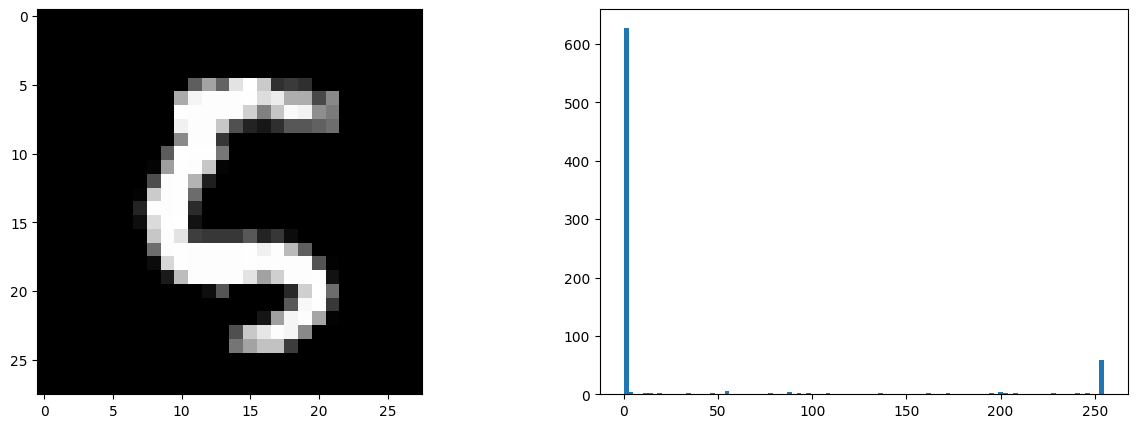

In [ ]:
plt.figure(1, figsize=(15, 5))
index = 5000

print(y_train[index])
plt.subplot(121)
plt.imshow(X_train[index],cmap="gray");
plt.subplot(122)
_,_,_=plt.hist(X_train[index].ravel(),100)

In [ ]:
# Define el modelo CNN
model = models.Sequential()

# Primera capa convolucional
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

# Segunda capa convolucional
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten Layer : permite concatenar las caracteristicas en un vector unidimensional (aplanar)
#sirve para preparar los datos de entrada a una red completamente conectada (FC - fully connected)
model.add(layers.Flatten())

# Fully Connected Layer
model.add(layers.Dense(64, activation='relu'))

# Capa de salida
model.add(layers.Dense(10, activation='softmax'))  # En este caso se tienen 10 clases

# Compile el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# mostar el resumen
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 64)               

In [ ]:
#one hot encoding
train_labels = to_categorical(y_train, num_classes=num_classes)
test_labels = to_categorical(y_test, num_classes=num_classes)
#entrenar el modelo
model.fit(X_train, train_labels, epochs=5, batch_size=100)


Epoch 1/5
600/600 [==============================] - 10s 16ms/step - loss: 0.5730 - accuracy: 0.9113
Epoch 2/5
600/600 [==============================] - 10s 17ms/step - loss: 0.0739 - accuracy: 0.9781
Epoch 3/5
600/600 [==============================] - 10s 16ms/step - loss: 0.0504 - accuracy: 0.9847
Epoch 4/5
600/600 [==============================] - 10s 17ms/step - loss: 0.0397 - accuracy: 0.9879
Epoch 5/5
600/600 [==============================] - 10s 17ms/step - loss: 0.0325 - accuracy: 0.9899


In [ ]:
_, accuracy = model.evaluate(X_test, test_labels)
print('Accuracy: %.2f' % (accuracy*100))

313/313 [==============================] - 1s 3ms/step - loss: 0.0491 - accuracy: 0.9860
Accuracy: 98.60


### Caso 2:

Ejemplo de una red neuronal convolucional residual (ResNet) de tres capas que utiliza TensorFlow para clasificar imágenes. ResNet utiliza conexiones de salto (o atajos) para abordar el problema del gradiente que desaparece y mejorar el entrenamiento de redes profundas.

```python
import tensorflow as tf
from tensorflow.keras import layers, models

def residual_block(x, filters, kernel_size=3, stride=1):
    # Atajo o Shortcut: es la entrada al bloque, se usa para sumarlo al final con
    #el resultado de pasar esta misma entrada por las capas convolucionales
    shortcut = x
    
    # Primer capa convolucional
    x = layers.Conv2D(filters, kernel_size, strides=stride, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    
    # Segunda capa convolucional
    x = layers.Conv2D(filters, kernel_size, padding='same')(x)
    x = layers.BatchNormalization()(x)
    
    # Sumar el atajo con la salida de las capas convolucionales , generar la salida del bloque
    x = layers.Add()([x, shortcut])
    x = layers.ReLU()(x)
    
    return x

# Definir el modelo ResNet
def build_resnet():
    input_layer = layers.Input(shape=(64, 64, 3))
    
    # Capa convolucional inicial
    x = layers.Conv2D(32, 3, padding='same')(input_layer)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)
    
    # Agregar los bloques residuales, en este caso se itera por 3 ciclos, para pasar x
    # por 3 bloques identicos
    for _ in range(3):  # Three residual blocks
        x = residual_block(x, 32)
    
    # Pooling promedi
    x = layers.GlobalAveragePooling2D()(x)
    
    # Fully Connected
    x = layers.Dense(64, activation='relu')(x)
    
    # Output Layer - capa de salida
    output_layer = layers.Dense(10, activation='softmax')(x)  # Suponiendo que tenemos 10 clases
    
    model = models.Model(inputs=input_layer, outputs=output_layer)
    return model

# Instantiate the model
model = build_resnet()

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# imprimir resumen
model.summary()
```

**Explicación**:

1. **Función de bloque residual**: `residual_block` define un único bloque residual. Consta de dos capas convolucionales con normalización por lotes y activación ReLU, y una conexión directa. La salida del bloque es la suma de elementos del atajo y el resultado de las dos convoluciones.

`BatchNormalization()` es una técnica utilizada en redes neuronales para normalizar las activaciones de una capa, lo que contribuye a una mayor estabilidad y velocidad de entrenamiento.

La normalización por lotes (Batch Normalization) se aplica en una capa de una red neuronal después de la operación de convolución o la operación lineal. Consiste en dos pasos principales:

    a. Normalización: Se calcula la media y la desviación estándar de las activaciones en el lote de entrenamiento actual.

    b. Escala y Desplazamiento: Las activaciones se normalizan restando la media y dividiendo por la desviación estándar. Luego, se escalan y se desplazan utilizando dos parámetros aprendibles (gamma y beta). Esto permite que la red aprenda la mejor representación de los datos para el problema en cuestión.

La normalización por lotes ayuda a combatir el problema de la desvanecimiento/explotación del gradiente en redes profundas.


2. **Bloques residuales en el modelo**: En la función `build_resnet`, comenzamos con una capa convolucional inicial, seguida de tres bloques residuales.

3. **Agrupación promedio global - GlobalAveragePooling**: después de los bloques residuales, utilizamos la agrupación promedio global para convertir las dimensiones espaciales en un vector unidimensional.

4. **Capa completamente conectada - Fully connected**: los datos aplanados pasan a través de una capa completamente conectada.

5. **Capa de salida - Output Layer**: la capa final utiliza la función de activación softmax para generar probabilidades para cada clase.

6. **Compilación**: el modelo se compila con un optimizador, una función de pérdida y la métrica deseada para su evaluación.

7. **Resumen del modelo**: Esto imprime un resumen de la arquitectura del modelo.

Recuerde ajustar los parámetros (por ejemplo, forma de entrada, número de clases, tamaños de filtro, etc.) de acuerdo con su conjunto de datos específico y su tarea de clasificación.

In [ ]:
def residual_block(x, filters, kernel_size=3, stride=1):
    # Atajo o Shortcut: es la entrada al bloque, se usa para sumarlo al final con
    #el resultado de pasar esta misma entrada por las capas convolucionales
    shortcut = x

    # Primer capa convolucional
    x = layers.Conv2D(filters, kernel_size, strides=stride, padding='same')(x)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    # Segunda capa convolucional
    x = layers.Conv2D(filters, kernel_size, padding='same')(x)
    x = layers.BatchNormalization()(x)

    # Sumar el atajo con la salida de las capas convolucionales , generar la salida del bloque
    x = layers.Add()([x, shortcut])
    x = layers.ReLU()(x)

    return x

# Definir el modelo ResNet
def build_resnet():
    input_layer = layers.Input(shape=(28, 28, 1))

    # Capa convolucional inicial
    x = layers.Conv2D(32, 3, padding='same')(input_layer)
    x = layers.BatchNormalization()(x)
    x = layers.ReLU()(x)

    # Agregar los bloques residuales, en este caso se itera por 3 ciclos, para pasar x
    # por 3 bloques identicos
    for _ in range(3):  # Three residual blocks
        x = residual_block(x, 32)

    # Pooling promedi
    x = layers.GlobalAveragePooling2D()(x)

    # Fully Connected
    x = layers.Dense(64, activation='relu')(x)

    # Output Layer - capa de salida
    output_layer = layers.Dense(10, activation='softmax')(x)  # Suponiendo que tenemos 10 clases

    model = models.Model(inputs=input_layer, outputs=output_layer)
    return model

# Instantiate the model
model = build_resnet()

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# imprimir resumen
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_13 (Conv2D)             (None, 28, 28, 32)   320         ['input_2[0][0]']                
                                                                                                  
 batch_normalization_7 (BatchNo  (None, 28, 28, 32)  128         ['conv2d_13[0][0]']              
 rmalization)                                                                                     
                                                                                                  
 re_lu_7 (ReLU)                 (None, 28, 28, 32)   0           ['batch_normalization_7[0][

In [ ]:
#one hot encoding
train_labels = to_categorical(y_train, num_classes=num_classes)
test_labels = to_categorical(y_test, num_classes=num_classes)
#entrenar el modelo
model.fit(X_train, train_labels, epochs=5, batch_size=100)

Epoch 1/5
600/600 [==============================] - 90s 148ms/step - loss: 0.4135 - accuracy: 0.8916
Epoch 2/5
600/600 [==============================] - 89s 148ms/step - loss: 0.0788 - accuracy: 0.9777
Epoch 3/5
600/600 [==============================] - 89s 148ms/step - loss: 0.0586 - accuracy: 0.9827
Epoch 4/5
600/600 [==============================] - 92s 153ms/step - loss: 0.0497 - accuracy: 0.9854
Epoch 5/5
600/600 [==============================] - 91s 152ms/step - loss: 0.0449 - accuracy: 0.9861


In [ ]:
_, accuracy = model.evaluate(X_test, test_labels)
print('Accuracy: %.2f' % (accuracy*100))

313/313 [==============================] - 5s 15ms/step - loss: 0.2026 - accuracy: 0.9390
Accuracy: 93.90


### Caso 3:

La arquitectura VGG es conocida por sus profundas capas convolucionales. A continuación se muestra un ejemplo de una red neuronal convolucional (CNN) de tres capas que utiliza la arquitectura VGG con TensorFlow:

```python
import tensorflow as tf
from tensorflow.keras import layers, models

def build_vgg(input_shape, num_classes):
    model = models.Sequential()

    # Boque 1
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Boque 2
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Boque 3
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Flatten and Fully Connected Layers
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dense(4096, activation='relu'))

    # Output Layer
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Crear el modelo VGG
input_shape = (224, 224, 3)  # Ajustar segun necesidades
num_classes = 10  # Asumir 10 clases

model = build_vgg(input_shape, num_classes)

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Mostrar el resumen
model.summary()
```

**Explicación**
1. **Bloque 1**: Contiene dos capas convolucionales con 64 filtros cada una, seguidas de una agrupación máxima.

2. **Bloque 2**: Contiene dos capas convolucionales con 128 filtros cada una, seguidas de una agrupación máxima.

3. **Bloque 3**: Contiene tres capas convolucionales con 256 filtros cada una, seguidas de una agrupación máxima.

4. **Capas aplanadas y completamente conectadas - Flatten and Fully Connected Layers**: después de los bloques convolucionales, los datos se aplanan y pasan a través de dos capas completamente conectadas con 4096 unidades cada una.

5. **Capa de salida - Output Layer**: la capa final utiliza la función de activación softmax para generar probabilidades para cada clase.

Recuerde ajustar `input_shape` de acuerdo con las dimensiones de sus imágenes y configurar `num_classes` para que coincida con el número de clases en su tarea de clasificación. Además, prepare su conjunto de datos para entrenamiento y evaluación.

In [ ]:

def build_vgg(input_shape, num_classes):
    model = models.Sequential()

    # Boque 1
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Boque 2
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Boque 3
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Flatten and Fully Connected Layers
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dense(4096, activation='relu'))

    # Output Layer
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Crear el modelo VGG
input_shape = (28, 28, 1)  # Ajustar segun necesidades
num_classes = 10  # Asumir 10 clases

model = build_vgg(input_shape, num_classes)

# Compilar el modelo
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Mostrar el resumen
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 28, 28, 64)        640       
                                                                 
 conv2d_21 (Conv2D)          (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_22 (Conv2D)          (None, 14, 14, 128)       73856     
                                                                 
 conv2d_23 (Conv2D)          (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                  

In [ ]:
#one hot encoding
train_labels = to_categorical(y_train, num_classes=num_classes)
test_labels = to_categorical(y_test, num_classes=num_classes)
#entrenar el modelo
model.fit(X_train, train_labels, epochs=5, batch_size=100)

Epoch 1/5
600/600 [==============================] - 265s 440ms/step - loss: 0.3704 - accuracy: 0.9350
Epoch 2/5
600/600 [==============================] - 269s 449ms/step - loss: 0.0566 - accuracy: 0.9830
Epoch 3/5
600/600 [==============================] - 267s 445ms/step - loss: 0.0451 - accuracy: 0.9868
Epoch 4/5
600/600 [==============================] - 265s 441ms/step - loss: 0.0399 - accuracy: 0.9888
Epoch 5/5
600/600 [==============================] - 273s 455ms/step - loss: 0.0407 - accuracy: 0.9885


In [ ]:
_, accuracy = model.evaluate(X_test, test_labels)
print('Accuracy: %.2f' % (accuracy*100))

313/313 [==============================] - 15s 48ms/step - loss: 0.0847 - accuracy: 0.9798
Accuracy: 97.98


### Caso 4:
Un ejemplo de una red neuronal convolucional (CNN) de tres capas que utiliza la arquitectura VGG con convoluciones separables en TensorFlow:

```python
import tensorflow as tf
from tensorflow.keras import layers, models

def build_vgg_separable(input_shape, num_classes):
    model = models.Sequential()

    # Bloque 1 con Separable Convolutions
    model.add(layers.SeparableConv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.SeparableConv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Bloque 2 con Separable Convolutions
    model.add(layers.SeparableConv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.SeparableConv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Bloque 3 con Separable Convolutions
    model.add(layers.SeparableConv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.SeparableConv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.SeparableConv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Flatten and Fully Connected Layers
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dense(4096, activation='relu'))

    # Output Layer
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Crear el modelo VGG
input_shape = (224, 224, 3)  # ajustar de acuerdo a necesidades
num_classes = 10  # Assumir 10 clases

model = build_vgg_separable(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Imprimir el resumen
model.summary()
```

En este ejemplo, se utilizan las capas `SeparableConv2D` en lugar de las capas convolucionales normales. Las convoluciones separables son computacionalmente más eficientes que las convoluciones tradicionales, ya que factorizan la operación en una convolución profunda y una convolución puntual. Esto puede conducir a una reducción en la cantidad de parámetros y el costo computacional.

Recuerde ajustar `input_shape` de acuerdo con las dimensiones de sus imágenes y configurar `num_classes` para que coincida con el número de clases en su tarea de clasificación. Además, prepare su conjunto de datos para entrenamiento y evaluación.

In [ ]:
def build_vgg_separable(input_shape, num_classes):
    model = models.Sequential()

    # Bloque 1 con Separable Convolutions
    model.add(layers.SeparableConv2D(64, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.SeparableConv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Bloque 2 con Separable Convolutions
    model.add(layers.SeparableConv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.SeparableConv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Bloque 3 con Separable Convolutions
    model.add(layers.SeparableConv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.SeparableConv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.SeparableConv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Flatten and Fully Connected Layers
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dense(4096, activation='relu'))

    # Output Layer
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Crear el modelo VGG
input_shape = (28, 28, 1)  # ajustar de acuerdo a necesidades
num_classes = 10  # Assumir 10 clases

model = build_vgg_separable(input_shape, num_classes)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Imprimir el resumen
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 separable_conv2d_7 (Separab  (None, 28, 28, 64)       137       
 leConv2D)                                                       
                                                                 
 separable_conv2d_8 (Separab  (None, 28, 28, 64)       4736      
 leConv2D)                                                       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 separable_conv2d_9 (Separab  (None, 14, 14, 128)      8896      
 leConv2D)                                                       
                                                                 
 separable_conv2d_10 (Separa  (None, 14, 14, 128)     

In [ ]:
#one hot encoding
train_labels = to_categorical(y_train, num_classes=num_classes)
test_labels = to_categorical(y_test, num_classes=num_classes)
#entrenar el modelo
model.fit(X_train, train_labels, epochs=5, batch_size=100)

Epoch 1/5
600/600 [==============================] - 287s 476ms/step - loss: 2.3017 - accuracy: 0.1113
Epoch 2/5
600/600 [==============================] - 296s 493ms/step - loss: 2.3015 - accuracy: 0.1124
Epoch 3/5
600/600 [==============================] - 311s 518ms/step - loss: 2.3014 - accuracy: 0.1124
Epoch 4/5
600/600 [==============================] - 302s 503ms/step - loss: 2.3013 - accuracy: 0.1124
Epoch 5/5
600/600 [==============================] - 310s 516ms/step - loss: 2.3013 - accuracy: 0.1124


In [ ]:
_, accuracy = model.evaluate(X_test, test_labels)
print('Accuracy: %.2f' % (accuracy*100))

313/313 [==============================] - 9s 28ms/step - loss: 2.3011 - accuracy: 0.1135
Accuracy: 11.35
